In [5]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print("Set up complete")

Set up complete


In [6]:
data = pd.read_csv("Titanic-Dataset.csv")

In [7]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
Gender = pd.get_dummies(data["Sex"],dtype = int,drop_first = True)

In [11]:
Gender

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [13]:
data["Sex"] = Gender["male"]

In [14]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [16]:
data.drop(["Name","Ticket","Cabin","PassengerId"],axis = 1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S
887,1,1,0,19.0,0,0,30.0000,S
888,0,3,0,NaN,1,2,23.4500,S
889,1,1,1,26.0,0,0,30.0000,C


In [17]:
data.drop(["Embarked"],axis = 1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148


In [18]:
data.drop(["Name","Ticket","Cabin","PassengerId"],axis = 1,inplace = True)

In [19]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [20]:
data.drop("Embarked",axis = 1,inplace = True)

In [21]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [22]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [25]:
data.dropna(axis = 0,inplace = True)

In [26]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [28]:
data.shape

(714, 7)

In [29]:
data["Survived"].value_counts()

Survived
0    424
1    290
Name: count, dtype: int64

In [30]:
data[data["Survived"] == 0]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
4,0,3,1,35.0,0,0,8.0500
6,0,1,1,54.0,0,0,51.8625
7,0,3,1,2.0,3,1,21.0750
12,0,3,1,20.0,0,0,8.0500
...,...,...,...,...,...,...,...
883,0,2,1,28.0,0,0,10.5000
884,0,3,1,25.0,0,0,7.0500
885,0,3,0,39.0,0,5,29.1250
886,0,2,1,27.0,0,0,13.0000


In [31]:
data[data["Survived"] == 1]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
8,1,3,0,27.0,0,2,11.1333
9,1,2,0,14.0,1,0,30.0708
...,...,...,...,...,...,...,...
875,1,3,0,15.0,0,0,7.2250
879,1,1,0,56.0,0,1,83.1583
880,1,2,0,25.0,0,1,26.0000
887,1,1,0,19.0,0,0,30.0000


In [33]:
len(data[data["Survived"] == 0])

424

In [44]:
print(round(len(data[data["Survived"] == 1])/len(data),2))
print(round(len(data[data["Survived"] == 0])/len(data),2))

0.41
0.59


#### Separate Dependent and Indendent Data -

In [45]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [47]:
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = data["Survived"]

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [49]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare
328,3,0,31.0,1,1,20.5250
73,3,1,26.0,1,0,14.4542
253,3,1,30.0,1,0,16.1000
719,3,1,33.0,0,0,7.7750
666,2,1,25.0,0,0,13.0000
...,...,...,...,...,...,...
92,1,1,46.0,1,0,61.1750
134,2,1,25.0,0,0,13.0000
337,1,0,41.0,0,0,134.5000
548,3,1,33.0,1,1,20.5250


In [50]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare
149,2,1,42.0,0,0,13.0000
407,2,1,3.0,1,1,18.7500
53,2,0,29.0,1,0,26.0000
369,1,0,24.0,0,0,69.3000
818,3,1,43.0,0,0,6.4500
...,...,...,...,...,...,...
819,3,1,10.0,3,2,27.9000
164,3,1,1.0,4,1,39.6875
363,3,1,35.0,0,0,7.0500
56,2,0,21.0,0,0,10.5000


### Model Training -

In [51]:
lr = LogisticRegression()

In [52]:
lr.fit(X_train,y_train)

LogisticRegression()

In [53]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [54]:
X_train[:5]

,Pclass,Sex,Age,SibSp,Parch,Fare
328,3,0,31.0,1,1,20.5250
73,3,1,26.0,1,0,14.4542
253,3,1,30.0,1,0,16.1000
719,3,1,33.0,0,0,7.7750
666,2,1,25.0,0,0,13.0000


In [55]:
y_train[:5]

328    1
73     0
253    0
719    0
666    0
Name: Survived, dtype: int64

In [56]:
y_pred_train[:5]

array([0, 0, 0, 0, 0])

In [57]:
y_test[:5]

149    0
407    1
53     1
369    1
818    0
Name: Survived, dtype: int64

In [58]:
y_pred_test[:5]

array([0, 0, 1, 1, 0])

### Evaluation Metrics -

In [59]:
confusion_matrix(y_train,y_pred_train)

array([[290,  47],
       [ 60, 174]])

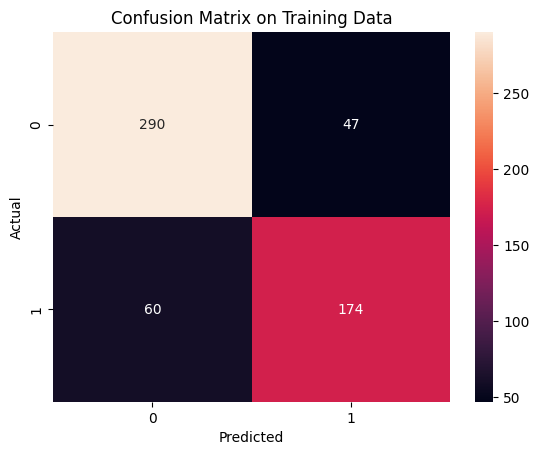

In [60]:
sns.heatmap(confusion_matrix(y_train,y_pred_train),annot = True,fmt = ".3g")
plt.title("Confusion Matrix on Training Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [61]:
accuracy_score(y_train,y_pred_train)

0.8126094570928196

In [63]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       337
           1       0.79      0.74      0.76       234

    accuracy                           0.81       571
   macro avg       0.81      0.80      0.80       571
weighted avg       0.81      0.81      0.81       571



### Test Data -

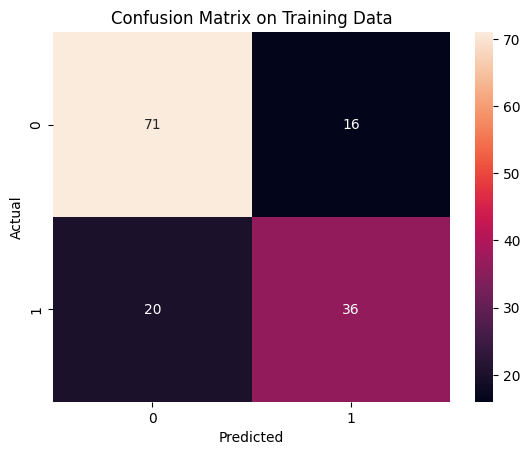

In [64]:
sns.heatmap(confusion_matrix(y_test,y_pred_test),annot = True,fmt = ".3g")
plt.title("Confusion Matrix on Training Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [65]:
accuracy_score(y_test,y_pred_test)

0.7482517482517482

In [66]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80        87
           1       0.69      0.64      0.67        56

    accuracy                           0.75       143
   macro avg       0.74      0.73      0.73       143
weighted avg       0.75      0.75      0.75       143

